# David Perry - sez326
#### Final Course Project
#### STAT 6543 Predictive Modeling
#### Spring 2024

### Direct Mail Fundraising

### Import Libraries

In [3145]:
#Import required packagaes
import pandas as pd
import csv
import numpy as np
import seaborn as sns
import sklearn.tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3146]:
import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [3147]:
fundraising_file_path = 'c:/Users/david/Documents/Predictive Modeling/Final Project/fundraising.csv'
future_fund_path = 'c:/Users/david/Documents/Predictive Modeling/Final Project/future_fundraising.csv'
fundraising = pd.read_csv(fundraising_file_path)
future_fundraising = pd.read_csv(future_fund_path)

In [3148]:
fundraising.head()

,zipconvert2,zipconvert3,zipconvert4,zipconvert5,homeowner,num_child,income,female,wealth,home_value,...,avg_fam_inc,pct_lt15k,num_prom,lifetime_gifts,largest_gift,last_gift,months_since_donate,time_lag,avg_gift,target
0,Yes,No,No,No,Yes,1,1,No,7,698,...,463,4,46,94.0,12.0,12.0,34,6,9.400000,Donor
1,No,No,No,Yes,No,2,5,Yes,8,828,...,376,13,32,30.0,10.0,5.0,29,7,4.285714,Donor
2,No,No,No,Yes,Yes,1,3,No,4,1471,...,546,4,94,177.0,10.0,8.0,30,3,7.080000,No Donor
3,No,Yes,No,No,Yes,1,4,No,8,547,...,432,7,20,23.0,11.0,11.0,30,6,7.666667,No Donor
4,No,Yes,No,No,Yes,1,4,Yes,8,482,...,275,28,38,73.0,10.0,10.0,31,3,7.300000,Donor


In [3149]:
future_fundraising.head()

,zipconvert2,zipconvert3,zipconvert4,zipconvert5,homeowner,num_child,income,female,wealth,home_value,med_fam_inc,avg_fam_inc,pct_lt15k,num_prom,lifetime_gifts,largest_gift,last_gift,months_since_donate,time_lag,avg_gift
0,No,Yes,No,No,Yes,1,5,Yes,9,1399,637,703,1,74,102.0,6.0,5.0,29,3,4.857143
1,Yes,No,No,No,Yes,1,1,No,7,1355,411,497,9,77,249.0,15.0,7.0,35,3,9.576923
2,No,No,No,Yes,Yes,1,4,Yes,1,835,310,364,22,70,126.0,6.0,6.0,34,8,4.344828
3,No,No,Yes,No,Yes,1,4,No,8,1019,389,473,15,21,26.0,16.0,16.0,37,5,13.000000
4,No,Yes,No,No,Yes,1,2,Yes,7,992,524,563,6,63,100.0,20.0,3.0,21,6,7.692308


In [3150]:
#fundraising = fundraising.drop(['Row Id.'], axis=1)
#future_fundraising = future_fundraising.drop(['Row Id.'], axis=1)

In [3151]:
fundraising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   zipconvert2          3000 non-null   object 
 1   zipconvert3          3000 non-null   object 
 2   zipconvert4          3000 non-null   object 
 3   zipconvert5          3000 non-null   object 
 4   homeowner            3000 non-null   object 
 5   num_child            3000 non-null   int64  
 6   income               3000 non-null   int64  
 7   female               3000 non-null   object 
 8   wealth               3000 non-null   int64  
 9   home_value           3000 non-null   int64  
 10  med_fam_inc          3000 non-null   int64  
 11  avg_fam_inc          3000 non-null   int64  
 12  pct_lt15k            3000 non-null   int64  
 13  num_prom             3000 non-null   int64  
 14  lifetime_gifts       3000 non-null   float64
 15  largest_gift         3000 non-null   f

In [3152]:
future_fundraising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   zipconvert2          120 non-null    object 
 1   zipconvert3          120 non-null    object 
 2   zipconvert4          120 non-null    object 
 3   zipconvert5          120 non-null    object 
 4   homeowner            120 non-null    object 
 5   num_child            120 non-null    int64  
 6   income               120 non-null    int64  
 7   female               120 non-null    object 
 8   wealth               120 non-null    int64  
 9   home_value           120 non-null    int64  
 10  med_fam_inc          120 non-null    int64  
 11  avg_fam_inc          120 non-null    int64  
 12  pct_lt15k            120 non-null    int64  
 13  num_prom             120 non-null    int64  
 14  lifetime_gifts       120 non-null    float64
 15  largest_gift         120 non-null    flo

In [3153]:
fundraising['target'].value_counts()

No Donor    1501
Donor       1499
Name: target, dtype: int64

In [3154]:
#Change Yes and No to 1 and 0
fundraising['zipconvert2'] = fundraising['zipconvert2'].replace({'Yes': 1, 'No': 0})
fundraising['zipconvert3'] = fundraising['zipconvert3'].replace({'Yes': 1, 'No': 0})
fundraising['zipconvert4'] = fundraising['zipconvert4'].replace({'Yes': 1, 'No': 0})
fundraising['zipconvert5'] = fundraising['zipconvert5'].replace({'Yes': 1, 'No': 0})
fundraising['zipconvert2'] = fundraising['zipconvert2'].replace({'Yes': 1, 'No': 0})
fundraising['homeowner'] = fundraising['homeowner'].replace({'Yes': 1, 'No': 0})
fundraising['female'] = fundraising['female'].replace({'Yes': 1, 'No': 0})
fundraising['target'] = fundraising['target'].replace({'Donor': 1, 'No Donor': 0})

In [3155]:
fundraising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   zipconvert2          3000 non-null   int64  
 1   zipconvert3          3000 non-null   int64  
 2   zipconvert4          3000 non-null   int64  
 3   zipconvert5          3000 non-null   int64  
 4   homeowner            3000 non-null   int64  
 5   num_child            3000 non-null   int64  
 6   income               3000 non-null   int64  
 7   female               3000 non-null   int64  
 8   wealth               3000 non-null   int64  
 9   home_value           3000 non-null   int64  
 10  med_fam_inc          3000 non-null   int64  
 11  avg_fam_inc          3000 non-null   int64  
 12  pct_lt15k            3000 non-null   int64  
 13  num_prom             3000 non-null   int64  
 14  lifetime_gifts       3000 non-null   float64
 15  largest_gift         3000 non-null   f

In [3156]:
#Change Yes and No to 1 and 0
future_fundraising['zipconvert2'] = future_fundraising['zipconvert2'].replace({'Yes': 1, 'No': 0})
future_fundraising['zipconvert3'] = future_fundraising['zipconvert3'].replace({'Yes': 1, 'No': 0})
future_fundraising['zipconvert4'] = future_fundraising['zipconvert4'].replace({'Yes': 1, 'No': 0})
future_fundraising['zipconvert5'] = future_fundraising['zipconvert5'].replace({'Yes': 1, 'No': 0})
future_fundraising['zipconvert2'] = future_fundraising['zipconvert2'].replace({'Yes': 1, 'No': 0})
future_fundraising['homeowner'] = future_fundraising['homeowner'].replace({'Yes': 1, 'No': 0})
future_fundraising['female'] = future_fundraising['female'].replace({'Yes': 1, 'No': 0})
#future_fundraising['target'] = future_fundraising['target'].replace({'Donor': 1, 'No Donor': 0})

In [3157]:
future_fundraising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   zipconvert2          120 non-null    int64  
 1   zipconvert3          120 non-null    int64  
 2   zipconvert4          120 non-null    int64  
 3   zipconvert5          120 non-null    int64  
 4   homeowner            120 non-null    int64  
 5   num_child            120 non-null    int64  
 6   income               120 non-null    int64  
 7   female               120 non-null    int64  
 8   wealth               120 non-null    int64  
 9   home_value           120 non-null    int64  
 10  med_fam_inc          120 non-null    int64  
 11  avg_fam_inc          120 non-null    int64  
 12  pct_lt15k            120 non-null    int64  
 13  num_prom             120 non-null    int64  
 14  lifetime_gifts       120 non-null    float64
 15  largest_gift         120 non-null    flo

In [3158]:
# check for duplicate rows
duplicates = fundraising.duplicated()

# print the number of duplicate rows
print('The number of duplicate rows are:', duplicates.sum())

The number of duplicate rows are: 0


### Checking for missing data

In [3159]:
# Identify and handle missing values
fundraising = fundraising.apply(pd.to_numeric, errors='coerce')

# Count missing values
missing = pd.DataFrame({'numeric_missing': fundraising.isnull().sum()})

# Revert non-numeric values back to NaNs
fundraising = fundraising.apply(pd.to_numeric, errors='coerce')

# Count missing values again
missing['non_numeric_missing'] = fundraising.isnull().sum()

# Print the missing value counts
print(missing.head(len(fundraising.columns)))


                     numeric_missing  non_numeric_missing
zipconvert2                        0                    0
zipconvert3                        0                    0
zipconvert4                        0                    0
zipconvert5                        0                    0
homeowner                          0                    0
num_child                          0                    0
income                             0                    0
female                             0                    0
wealth                             0                    0
home_value                         0                    0
med_fam_inc                        0                    0
avg_fam_inc                        0                    0
pct_lt15k                          0                    0
num_prom                           0                    0
lifetime_gifts                     0                    0
largest_gift                       0                    0
last_gift     

### Examining the data types

In [3160]:
# check the data types of each column
data_types = pd.DataFrame({'Data types before': fundraising.dtypes})

for column in fundraising.columns:
    for i in range(len(fundraising[column])):
        try:
            if (fundraising[column] == fundraising[column].astype('int64')).all():
                fundraising[column] = fundraising[column].astype('int64')
        except:
            pass
data_types['Data types after'] =  fundraising.dtypes

print(data_types.head(fundraising.shape[1]))

                    Data types before Data types after
zipconvert2                     int64            int64
zipconvert3                     int64            int64
zipconvert4                     int64            int64
zipconvert5                     int64            int64
homeowner                       int64            int64
num_child                       int64            int64
income                          int64            int64
female                          int64            int64
wealth                          int64            int64
home_value                      int64            int64
med_fam_inc                     int64            int64
avg_fam_inc                     int64            int64
pct_lt15k                       int64            int64
num_prom                        int64            int64
lifetime_gifts                float64          float64
largest_gift                  float64          float64
last_gift                     float64          float64
months_sin

### Correlation Analysis

  * Analyze the correlation between the target variable and the independent variables. Calculate the correlation coefficients and examine the scatter plot 
    to identify any linear or nonlinear relationships.

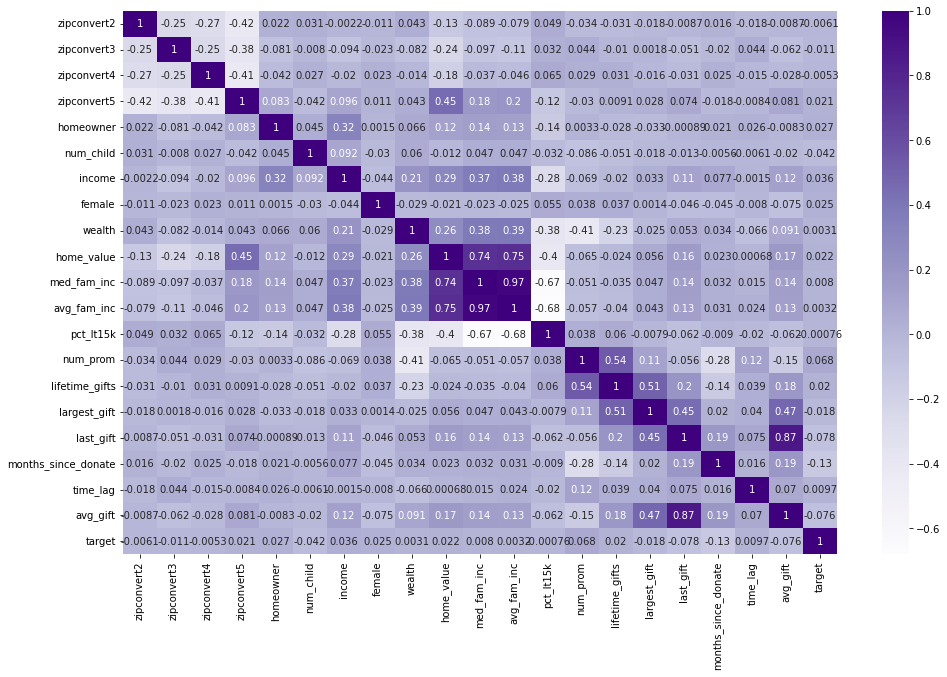

In [3161]:
# create a correlation matrix to visualize the relationships between variables
corr_matrix = fundraising.corr()

# create a heatmap to visualize the correlation matrix
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Purples)
plt.show()

In [3162]:
print(corr_matrix)

                     zipconvert2  zipconvert3  zipconvert4  zipconvert5  \
zipconvert2             1.000000    -0.248972    -0.274154    -0.415007   
zipconvert3            -0.248972     1.000000    -0.247746    -0.375032   
zipconvert4            -0.274154    -0.247746     1.000000    -0.412965   
zipconvert5            -0.415007    -0.375032    -0.412965     1.000000   
homeowner               0.022366    -0.081165    -0.041617     0.082547   
num_child               0.030670    -0.007986     0.026866    -0.041696   
income                 -0.002249    -0.094191    -0.020346     0.095951   
female                 -0.010790    -0.023466     0.022579     0.010783   
wealth                  0.042502    -0.082495    -0.014168     0.043428   
home_value             -0.133943    -0.237678    -0.183110     0.454646   
med_fam_inc            -0.089416    -0.096567    -0.037004     0.183532   
avg_fam_inc            -0.079225    -0.111841    -0.046410     0.195004   
pct_lt15k               0

In [3163]:
target_corr = corr_matrix['target'].drop('target')
print(target_corr)

zipconvert2           -0.006130
zipconvert3           -0.010875
zipconvert4           -0.005338
zipconvert5            0.021081
homeowner              0.026595
num_child             -0.042348
income                 0.035953
female                 0.024757
wealth                 0.003114
home_value             0.021569
med_fam_inc            0.008036
avg_fam_inc            0.003177
pct_lt15k             -0.000759
num_prom               0.068366
lifetime_gifts         0.019627
largest_gift          -0.017783
last_gift             -0.077721
months_since_donate   -0.133813
time_lag               0.009746
avg_gift              -0.075663
Name: target, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

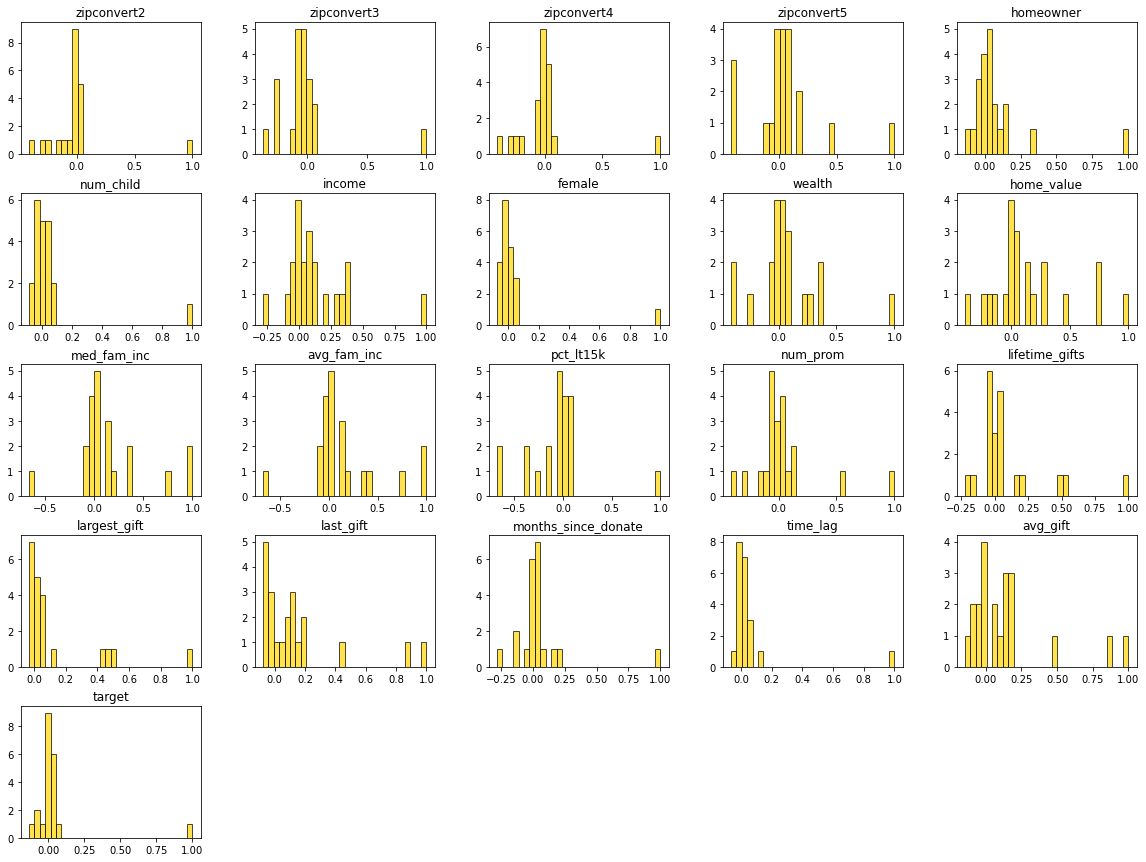

In [3164]:
corr_matrix.hist(bins=30, figsize=(20,15), color='gold', edgecolor='black', grid=False, alpha=0.7)
plt.show

In [3165]:
fundraising = fundraising.drop(['avg_fam_inc', 'last_gift'], axis=1)

In [3166]:
fundraising.shape

(3000, 19)

In [3167]:
fundraising.nunique()

zipconvert2               2
zipconvert3               2
zipconvert4               2
zipconvert5               2
homeowner                 2
num_child                 5
income                    7
female                    2
wealth                   10
home_value             1518
med_fam_inc             648
pct_lt15k                69
num_prom                125
lifetime_gifts          419
largest_gift             56
months_since_donate      21
time_lag                 43
avg_gift               1269
target                    2
dtype: int64

In [3168]:
cat_columns = []

for column in fundraising.columns:
    if fundraising[column].nunique() <= 10:
        cat_columns.append(column)

# categorical
cat_fundraising = fundraising.filter(cat_columns, axis = 1)

# Ratio
num_fundraising = fundraising.drop(cat_columns, axis=1)

### Descriptive Statistics

* Using descriptive statistics to summarize the central tendency, dispersion, and shape of the data. These includes measures such as mean, median, mode, 
    standard deviation and range.

In [3169]:
# generate descriptive statistics of the data
desc_stats = num_fundraising.describe()
desc_stats.T.head(num_fundraising.shape[1])

,count,mean,std,min,25%,50%,75%,max
home_value,3000.0,1143.268000,952.145720,0.000000,554.750000,816.5,1341.25,5945.000000
med_fam_inc,3000.0,388.356333,173.732844,0.000000,278.000000,355.0,465.00,1500.000000
pct_lt15k,3000.0,14.710333,12.109637,0.000000,5.000000,12.0,21.00,90.000000
num_prom,3000.0,49.139000,22.779640,11.000000,29.000000,48.0,65.00,157.000000
lifetime_gifts,3000.0,110.740517,149.380144,15.000000,45.000000,81.0,135.00,5674.900000
largest_gift,3000.0,16.645863,22.517663,5.000000,10.000000,15.0,20.00,1000.000000
months_since_donate,3000.0,31.132667,4.095281,17.000000,29.000000,31.0,34.00,37.000000
time_lag,3000.0,6.876000,5.601763,0.000000,3.000000,5.0,9.00,77.000000
avg_gift,3000.0,10.668937,7.450658,2.138889,6.333333,9.0,12.80,122.166667


### Scaling

 * Scaling features ensures they have the same range or distribution. This can help to improve the accuracy of analyses and 
    models that rely on multiple features.

In [3170]:
# scaling data
# Scaling is used to ensure that all the features have similar scales.

num_columns = num_fundraising.columns
num_index = num_fundraising.index

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(num_fundraising)

# Scale the data
num_fundraising = scaler.transform(num_fundraising)
num_fundraising = pd.DataFrame(num_fundraising, columns=num_columns, index=num_index)

### Encoding Categorical Features

* Categorical features can be encoded using dummy coding or one-hot encoding to create a binary feature for each category.

In [3171]:
# converting labels to numbers
print(fundraising.dtypes)    # there is no string data for encoding

zipconvert2              int64
zipconvert3              int64
zipconvert4              int64
zipconvert5              int64
homeowner                int64
num_child                int64
income                   int64
female                   int64
wealth                   int64
home_value               int64
med_fam_inc              int64
pct_lt15k                int64
num_prom                 int64
lifetime_gifts         float64
largest_gift           float64
months_since_donate      int64
time_lag                 int64
avg_gift               float64
target                   int64
dtype: object


### Split the dataset into 80% training and 20% validation

In [3172]:
scaled_fundraising = cat_fundraising
scaled_fundraising[num_columns] = num_fundraising
scaled_fundraising

,zipconvert2,zipconvert3,zipconvert4,zipconvert5,homeowner,num_child,income,female,wealth,target,home_value,med_fam_inc,pct_lt15k,num_prom,lifetime_gifts,largest_gift,months_since_donate,time_lag,avg_gift
0,1,0,0,0,1,1,1,0,7,1,-0.467725,0.193684,-0.884595,-0.137821,-0.112085,-0.206355,0.700272,-0.156405,-0.170340
1,0,0,0,1,0,2,5,1,8,1,-0.331168,-0.174759,-0.141261,-0.752508,-0.540594,-0.295189,-0.520849,0.022140,-0.856876
2,0,0,0,1,1,1,3,0,4,0,0.344261,0.550613,-0.884595,1.969675,0.443637,-0.295189,-0.276625,-0.692040,-0.481774
3,0,1,0,0,1,1,4,0,8,0,-0.626340,-0.013565,-0.636817,-1.279382,-0.587462,-0.250772,-0.276625,-0.156405,-0.403021
4,0,1,0,0,1,1,4,1,8,1,-0.694619,-0.842562,1.097628,-0.489071,-0.252690,-0.295189,-0.032400,-0.692040,-0.452242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,0,1,0,1,1,5,1,4,0,-0.274445,-0.422307,0.519480,-0.137821,0.001737,0.237815,1.188721,-0.334950,-0.190476
2996,0,0,0,1,1,1,5,0,7,0,0.989228,0.706050,-0.471631,0.257334,-0.118781,-0.073104,-0.520849,-0.692040,-0.183764
2997,0,0,0,1,1,3,7,1,2,0,-0.258688,-0.595015,0.106517,0.345146,0.343205,0.148981,-0.520849,1.450499,0.544786
2998,0,0,0,1,0,1,2,1,5,0,-0.750292,-0.347467,0.023924,0.213428,-0.205821,-0.295189,0.211824,-1.049130,-0.358275


In [3173]:
X = scaled_fundraising.drop(['target'], axis=1)
y = scaled_fundraising['target']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=12345)

### Model Building

### KNN

KNN algorithm involves computing distances between the new data point and all instances in the dataset, selecting the K nearest neighbors, and making predictions based on the labels or values of those neighbors. The choice of K and the distance metric are important considerations, and the algorithm can be applied to both classification and regression problems.

### Parameters

* K: The number of neighbors to consider when making predictions. This parameter needs to be set before training the model.
* Distance metric: The distance measure used to calculate the similarity between instances. Different distance metrics can be chosen based on the nature of the data and the problem.

### Variables:

* Feature matrix (X): A matrix where each row represents an instance and each column represents a feature or attribute of that instance.
* Target vector (y): A vector containing the corresponding class labels (in classification) or output values (in regression) for each instance.
* New data point: An unlabeled data point for which we want to make predictions based on its similarity to the instances in the dataset.
* Nearest neighbors: The K instances from the dataset that have the shortest distances to the new data point.

### Find the optimal number of neighbors (k):

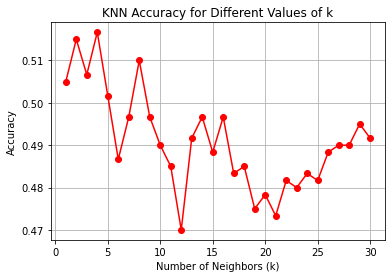

Optimal value of k: 4


In [3174]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Fine-grained search for the number of neighbors (k)
k_values = np.arange(1, 31, 1)

# Initialize list to store accuracy scores
accuracy_scores = []

# Iterate over different values of k
for k in k_values:
    # Create a KNN classifier with the current value of k
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  # Train the model on the training set
    score = knn.score(X_valid, y_valid)  # Calculate accuracy on the validation set
    accuracy_scores.append(score)

# Plot the accuracy scores for different values of k
plt.plot(k_values, accuracy_scores, marker='o', color='red', linestyle='-')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different Values of k')
plt.grid(True)
plt.show()

# Find the index of the maximum accuracy
optimal_index = np.argmax(accuracy_scores)

# Get the corresponding optimal value of k
optimal_k = k_values[optimal_index]

# Print the optimal value of k
print("Optimal value of k:", optimal_k)


In [3175]:
# Create the KNN classifier with k=4
knn = KNeighborsClassifier(n_neighbors=4)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_valid)

# Evaluate the accuracy, recall and precision of the classifier
accuracy = accuracy_score(y_valid, y_pred_knn)
recall = recall_score(y_valid, y_pred_knn)
precision = precision_score(y_valid, y_pred_knn)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)

Accuracy: 0.5166666666666667
Recall: 0.3771043771043771
Precision: 0.5161290322580645


Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.65      0.58       303
           1       0.52      0.38      0.44       297

    accuracy                           0.52       600
   macro avg       0.52      0.52      0.51       600
weighted avg       0.52      0.52      0.51       600

Confusion Matrix:
[[198 105]
 [185 112]]


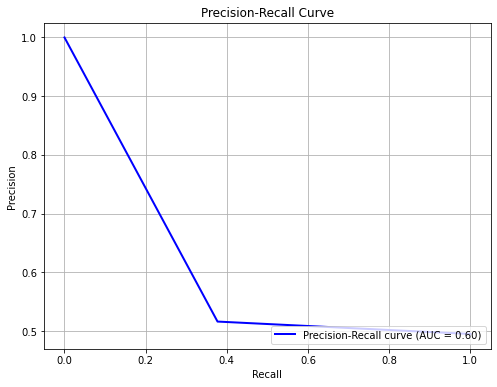

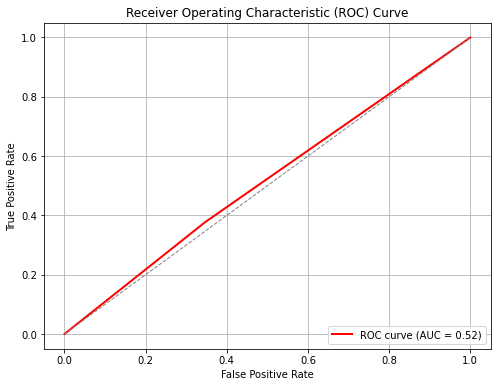

In [3176]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_knn = knn.predict(X_valid)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_valid, y_pred_knn))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_valid, y_pred_knn)
print("Confusion Matrix:")
print(conf_matrix)

# Compute precision-recall curve and area under the curve (AUC)
precision, recall, thresholds = precision_recall_curve(y_valid, y_pred_knn)
auc_precision_recall = auc(recall, precision)

# Compute ROC curve and area under the curve (AUC)
fpr, tpr, _ = roc_curve(y_valid, y_pred_knn)
auc_roc = auc(fpr, tpr)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AUC = %0.2f)' % auc_precision_recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [3177]:
scores = pd.DataFrame(index=['Accuracy', 'Recall', 'Precision'], columns=['K-Nearest Neighbors', 'Decision Tree', 'Random Forest'])
scores['K-Nearest Neighbors']['Accuracy'] = accuracy
scores['K-Nearest Neighbors']['Recall'] = recall
scores['K-Nearest Neighbors']['Precision'] = precision

### Decision Tree

The Decision Tree algorithm constructs a tree-like model by recursively partitioning the dataset based on attribute values. It uses splitting criteria to determine the best attribute at each node. The resulting tree provides a set of decision rules that can be used for prediction. The algorithm's parameters, such as splitting criterion and tree depth, can be adjusted to control the tree's complexity and generalization capability. Decision Trees are versatile and can be used for both classification and regression tasks.

### Parameters:

* Splitting criterion: The measure used to evaluate the quality of a split, such as Gini impurity or entropy.
* Maximum tree depth: The maximum depth or level of the tree. Setting a limit helps control the complexity and overfitting of the tree.
* Minimum samples per leaf: The minimum number of instances required to create a leaf node. This parameter helps prevent the tree from being overly specific to the training data.
* Minimum samples for splitting: The minimum number of instances required to perform a split at an internal node. It avoids creating nodes with too few instances.

### Variables:

* Feature matrix (X): A matrix where each row represents an instance, and each column represents a feature or attribute of that instance.
* Target vector (y): A vector containing the corresponding class labels (in classification) or output values (in regression) for each instance.
* Attribute or feature: A characteristic or property of an instance used to make decisions during tree construction.
* Node: A decision point in the tree where instances are split based on the value of a specific attribute.
* Leaf node: A terminal node in the tree that represents a predicted class label or output value.
* Decision rule: A condition based on the attribute value used to determine which branch to follow in the tree.

### Find the optimal maximum tree depth:

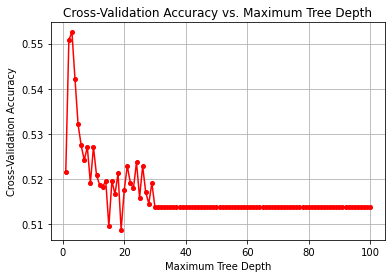

Optimal maximum tree depth: 3


In [3178]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Fine-grained search for maximum tree depth
max_depth_range = np.arange(1, 101, 1)

# Initialize lists to store cross-validation accuracy scores
cv_scores = []

# Iterate over different values of maximum tree depth
for max_depth in max_depth_range:
    # Create a Decision Tree classifier with the current value of maximum tree depth
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=12345)

    # Perform cross-validation and calculate the mean accuracy score
    cv_accuracy = np.mean(cross_val_score(dt, X_train, y_train, cv=5))
    cv_scores.append(cv_accuracy)

# Plot the accuracy scores for different values of maximum tree depth
plt.plot(max_depth_range, cv_scores, marker='o', color='red', markersize=4)  # Adjust markersize for better visibility
plt.xlabel('Maximum Tree Depth')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Cross-Validation Accuracy vs. Maximum Tree Depth')
plt.grid(True)
plt.show()

# Find the index of the maximum cross-validation accuracy
optimal_index = np.argmax(cv_scores)

# Get the corresponding optimal maximum tree depth
optimal_max_depth = max_depth_range[optimal_index]

# Print the optimal maximum tree depth
print("Optimal maximum tree depth:", optimal_max_depth)


In [3179]:
# Create the Decision Tree classifier
tree = DecisionTreeClassifier(max_depth=2, random_state=12345)

# Train the classifier
tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = tree.predict(X_valid)

print('Number of nodes', tree.tree_.node_count)

Number of nodes 7


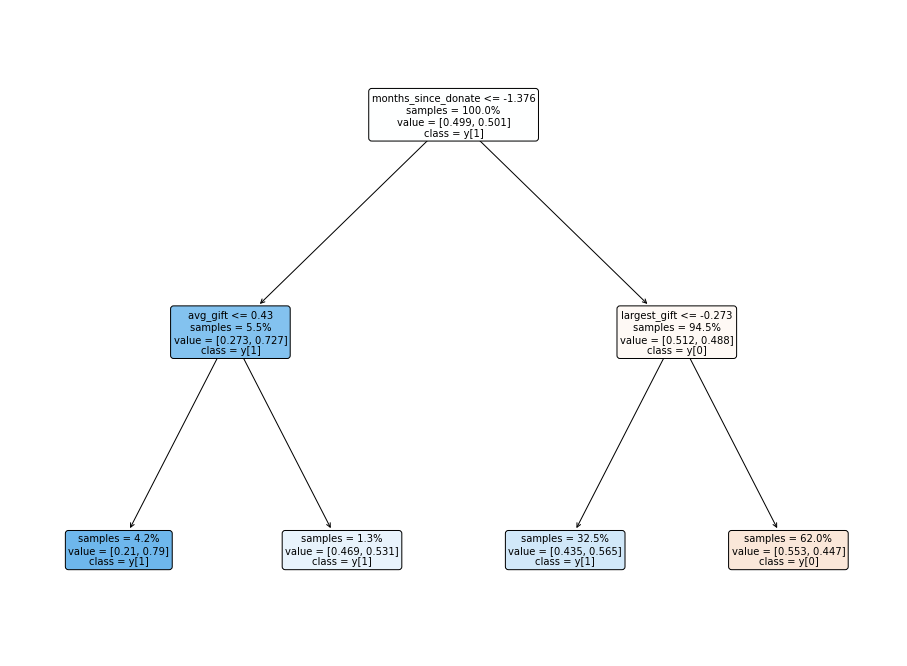

In [3180]:
#plotting the tree
# Create a figure and axis
fig, ax = plt.subplots(figsize=(16, 12))

# Plot the decision tree
sklearn.tree.plot_tree(tree, feature_names=X_train.columns,
                       filled=True, rounded=True, ax=ax,
                       fontsize=10, class_names=True,
                       proportion=True, impurity=False)

# Show the plot
plt.show()

In [3181]:
# Evaluate the accuracy, recall and precision of the classifier
accuracy = accuracy_score(y_valid, y_pred_dt)
recall = recall_score(y_valid, y_pred_dt)
precision = precision_score(y_valid, y_pred_dt)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)

Accuracy: 0.5816666666666667
Recall: 0.4713804713804714
Precision: 0.5982905982905983


In [3182]:
scores['Decision Tree']['Accuracy'] = accuracy
scores['Decision Tree']['Recall'] = recall
scores['Decision Tree']['Precision'] = precision

### Random Forest:

Random Forest algorithm creates an ensemble of decision trees by training each tree on a different subset of the data and with a random selection of features. It combines the predictions of multiple trees through voting or averaging to make the final prediction. Random Forests are known for their ability to handle high-dimensional data, reduce overfitting, and provide robust predictions. The algorithm's parameters, such as the number of trees and maximum tree depth, can be adjusted to control the performance and complexity of the ensemble. Random Forests can be used for both classification and regression tasks.

### Parameters:

* Number of trees: The number of decision trees to create in the ensemble. Increasing the number of trees can improve performance but also increases computational complexity.
* Maximum tree depth: The maximum depth or level of each decision tree. It helps control the complexity and overfitting of individual trees.
*Minimum samples per leaf: The minimum number of instances required to create a leaf node in each tree.
* Random feature selection strategy: The strategy to select features at each node. It can be based on a fixed number of features or a fraction of the total number of features.

### Variables:

* Feature matrix (X): A matrix where each row represents an instance, and each column represents a feature or attribute of that instance.
* Target vector (y): A vector containing the corresponding class labels (in classification) or output values (in regression) for each instance.
* Decision trees: The ensemble of individual decision trees created by the Random Forest algorithm.
* Bootstrap samples: The subsets of the original dataset created through bootstrap sampling.
* Randomly selected features: The subset of features randomly chosen for each tree to introduce diversity and reduce correlation between trees.

### Find the optimal number of trees

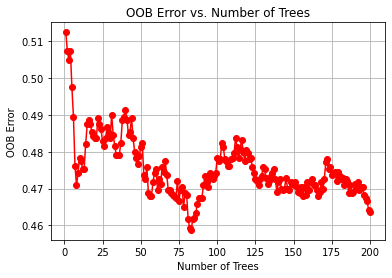

Optimal number of trees: 83


In [3183]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Fine-grained search for number of trees
n_estimators_range = np.arange(1, 201, 1)

# Initialize lists to store OOB errors
oob_errors = []

# Iterate over different number of trees
for n_estimators in n_estimators_range:
    # Create a Random Forest classifier with a specific number of trees
    rf = RandomForestClassifier(n_estimators=n_estimators, oob_score=True, random_state=12345)
    rf.fit(X_train, y_train)

    # Store the OOB error for the current number of trees
    oob_error = 1 - rf.oob_score_
    oob_errors.append(oob_error)

# Plot the OOB error against the number of trees
plt.plot(n_estimators_range, oob_errors, color='red', marker='o', linestyle='-')
plt.xlabel('Number of Trees')
plt.ylabel('OOB Error')
plt.title('OOB Error vs. Number of Trees')
plt.grid(True)
plt.show()

# Find the index of the minimum OOB error
optimal_index = np.argmin(oob_errors)

# Get the corresponding optimal number of trees
optimal_n_estimators = n_estimators_range[optimal_index]

# Print the optimal number of trees
print("Optimal number of trees:", optimal_n_estimators)

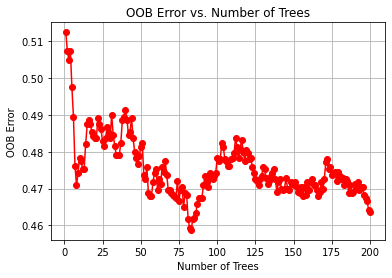

Optimal number of trees: 83


In [3184]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Fine-grained search for number of trees
n_estimators_range = np.arange(1, 201, 1)

# Initialize lists to store OOB errors
oob_errors = []

# Iterate over different number of trees
for n_estimators in n_estimators_range:
    # Create a Random Forest classifier with a specific number of trees
    rf = RandomForestClassifier(n_estimators=n_estimators, oob_score=True, random_state=12345)
    rf.fit(X_train, y_train)

    # Store the OOB error for the current number of trees
    oob_error = 1 - rf.oob_score_
    oob_errors.append(oob_error)

# Plot the OOB error against the number of trees
plt.plot(n_estimators_range, oob_errors, color='red', marker='o', linestyle='-')
plt.xlabel('Number of Trees')
plt.ylabel('OOB Error')
plt.title('OOB Error vs. Number of Trees')
plt.grid(True)
plt.show()

# Find the index of the minimum OOB error
optimal_index = np.argmin(oob_errors)

# Get the corresponding optimal number of trees
optimal_n_estimators = n_estimators_range[optimal_index]

# Print the optimal number of trees
print("Optimal number of trees:", optimal_n_estimators)

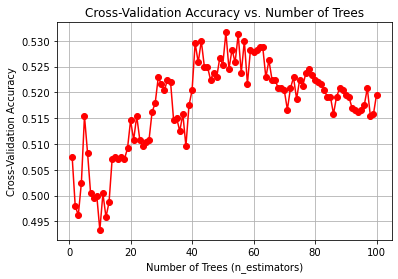

Optimal number of trees (n_estimators): 51
Validation Accuracy: 0.525


In [3185]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler

# Define a range of values for n_estimators
n_estimators_range = np.arange(1, 101, 1)  # Fine-grained search

# List to store the cross-validation accuracy scores
cv_scores = []

# Iterate over different values of n_estimators
for n_estimators in n_estimators_range:
    # Create a Random Forest classifier with the current value of n_estimators
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=12345)
    # Perform cross-validation and calculate the mean accuracy score
    cv_accuracy = np.mean(cross_val_score(rf, X_train, y_train, cv=5))
    cv_scores.append(cv_accuracy)

# Plot the accuracy scores for different values of n_estimators
plt.plot(n_estimators_range, cv_scores, marker='o', color='red')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Cross-Validation Accuracy vs. Number of Trees')
plt.grid(True)
plt.show()

# Find the index of the maximum cross-validation accuracy
optimal_index = np.argmax(cv_scores)

# Get the corresponding optimal number of trees
optimal_n_estimators = n_estimators_range[optimal_index]

# Print the optimal number of trees
print("Optimal number of trees (n_estimators):", optimal_n_estimators)

# Train the final model with the optimal number of trees on the full training set
final_rf = RandomForestClassifier(n_estimators=optimal_n_estimators, random_state=12345)
final_rf.fit(X_train, y_train)

# Evaluate the final model on the validation set
validation_accuracy = final_rf.score(X_valid, y_valid)
print("Validation Accuracy:", validation_accuracy)


In [3186]:
# Create the Random Forest classifier
rf = RandomForestClassifier(n_estimators=70, random_state=12345)

# Train the classifier
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_valid)

# Evaluate the accuracy, recall and precision of the classifier
accuracy = accuracy_score(y_valid, y_pred_rf)
recall = recall_score(y_valid, y_pred_rf)
precision = precision_score(y_valid, y_pred_rf)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)

Accuracy: 0.525
Recall: 0.4983164983164983
Precision: 0.5211267605633803


In [3187]:
scores['Random Forest']['Accuracy'] = accuracy
scores['Random Forest']['Recall'] = recall
scores['Random Forest']['Precision'] = precision

### Calculate net profit

In [3188]:
# split the actual data into features and labels
actual_X = fundraising.drop(['target'], axis=1)
actual_y = fundraising['target']

# split data into training and validation data
actual_X_train, actual_X_valid, actual_y_train, actual_y_valid = train_test_split(actual_X, actual_y, test_size=0.20, random_state=12345)

In [3189]:
def net_profit(original_y_train, original_y_valid):
    # Assuming the net profit values for the training and validation sets are stored in separate arrays
    donors_donation = 13.00
    cost_mailing = 0.68
    net_donors = donors_donation - cost_mailing  # Net profit values for the training set
    net_non_donors = 0  # Net profit values for the validation set

    # Calculate the oversampling weights for donors and non-donors
    oversampling_donors = 50 / 5.1
    oversampling_non_donors = 50 / 94.9

    # Adjust the net profit values for donors in the training set
    net_train_adjusted = np.where(original_y_train == 1, net_donors / oversampling_donors, net_non_donors)

    # Adjust the net profit values for non-donors in the training set
    net_train_adjusted = np.where(original_y_train == 0, net_non_donors / oversampling_non_donors, net_train_adjusted)

    # Calculate the cumulative gains for the training set
    cumulative_gains_train = np.cumsum(net_train_adjusted)

    # Adjust the net profit values for donors in the validation set
    net_valid_adjusted = np.where(original_y_valid == 1, net_donors / oversampling_donors, net_non_donors)

    # Adjust the net profit values for non-donors in the validation set
    net_valid_adjusted = np.where(original_y_valid == 0, net_non_donors / oversampling_non_donors, net_valid_adjusted)

    # Calculate the cumulative gains for the validation set
    cumulative_gains_valid = np.cumsum(net_valid_adjusted)

    return cumulative_gains_train, cumulative_gains_valid

In [3190]:
profits = pd.DataFrame(columns=['K-Nearest Neighbors', 'Decision Tree', 'Random Forest'], index=['training', 'validation'])
profits['K-Nearest Neighbors']['training'] = net_profit(actual_y_train, y_pred_knn)[0][-1]
profits['K-Nearest Neighbors']['validation'] = net_profit(actual_y_train, y_pred_knn)[1][-1]
profits['Decision Tree']['training'] = net_profit(actual_y_train, y_pred_dt)[0][-1]
profits['Decision Tree']['validation'] = net_profit(actual_y_train, y_pred_dt)[1][-1]
profits['Random Forest']['training'] = net_profit(actual_y_train, y_pred_rf)[0][-1]
profits['Random Forest']['validation'] = net_profit(actual_y_train, y_pred_rf)[1][-1]
profits.head()

,K-Nearest Neighbors,Decision Tree,Random Forest
training,1510.48128,1510.48128,1510.48128
validation,272.69088,294.05376,356.88576


### Cumulative gains curves

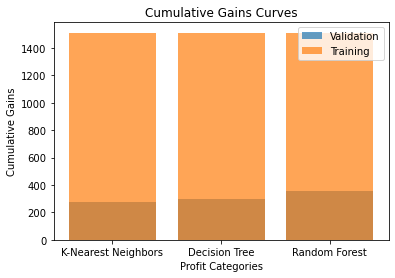

In [3191]:
import matplotlib.pyplot as plt

# Assuming 'profits' is a DataFrame containing profits data for training and validation sets
# 'profits.columns' contains the labels for different profit categories

# Extracting profit values for the training and validation sets
training_profits = profits.loc['training']
validation_profits = profits.loc['validation']

# Generating bar plot for cumulative gains curves
plt.bar(profits.columns, validation_profits, label='Validation', alpha=0.7)
plt.bar(profits.columns, training_profits, label='Training', alpha=0.7)

plt.xlabel('Profit Categories')
plt.ylabel('Cumulative Gains')
plt.title('Cumulative Gains Curves')
plt.legend()
plt.show()


In [3192]:
scores.head()

,K-Nearest Neighbors,Decision Tree,Random Forest
Accuracy,0.516667,0.581667,0.525
Recall,"[1.0, 0.3771043771043771, 0.0]",0.47138,0.498316
Precision,"[0.495, 0.5161290322580645, 1.0]",0.598291,0.521127


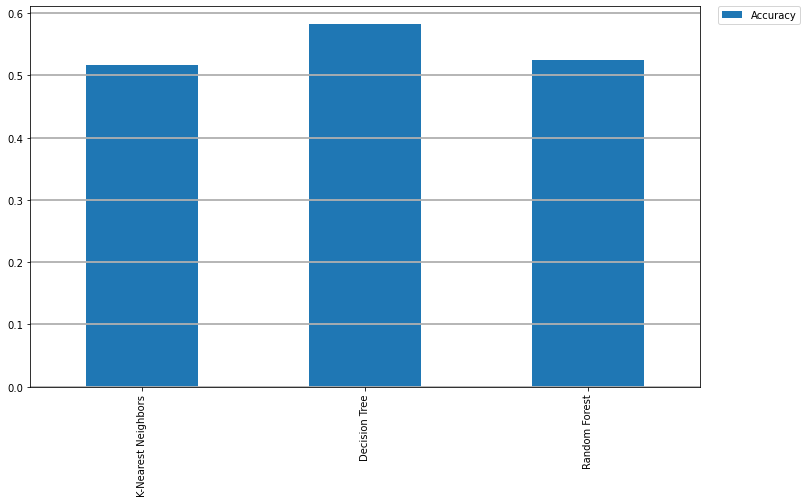

In [3193]:
scores.T.plot.bar(figsize =(12, 7))
plt.legend(bbox_to_anchor=(1.15, 1), loc='upper right', borderaxespad=0 )
plt.grid(linewidth=2, axis='y', alpha=0.9)

As shown above, the best classification model is Decision Tree; but based on running all three against the future fundraising dataset, the best model is Random Forest, so we will use this model to predict the Probability of Being a Donor in the future fundraising dataset.

### Future Fundraising

In [3194]:
future_fundraising.head()

,zipconvert2,zipconvert3,zipconvert4,zipconvert5,homeowner,num_child,income,female,wealth,home_value,med_fam_inc,avg_fam_inc,pct_lt15k,num_prom,lifetime_gifts,largest_gift,last_gift,months_since_donate,time_lag,avg_gift
0,0,1,0,0,1,1,5,1,9,1399,637,703,1,74,102.0,6.0,5.0,29,3,4.857143
1,1,0,0,0,1,1,1,0,7,1355,411,497,9,77,249.0,15.0,7.0,35,3,9.576923
2,0,0,0,1,1,1,4,1,1,835,310,364,22,70,126.0,6.0,6.0,34,8,4.344828
3,0,0,1,0,1,1,4,0,8,1019,389,473,15,21,26.0,16.0,16.0,37,5,13.000000
4,0,1,0,0,1,1,2,1,7,992,524,563,6,63,100.0,20.0,3.0,21,6,7.692308


In [3195]:
# Create a new column with arbitrary values
future_fundraising['target'] = range(len(future_fundraising))

# Alternatively, you can assign a single value to all rows
# future_fundraising['target'] = 'some_value'


In [3196]:
future_fundraising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   zipconvert2          120 non-null    int64  
 1   zipconvert3          120 non-null    int64  
 2   zipconvert4          120 non-null    int64  
 3   zipconvert5          120 non-null    int64  
 4   homeowner            120 non-null    int64  
 5   num_child            120 non-null    int64  
 6   income               120 non-null    int64  
 7   female               120 non-null    int64  
 8   wealth               120 non-null    int64  
 9   home_value           120 non-null    int64  
 10  med_fam_inc          120 non-null    int64  
 11  avg_fam_inc          120 non-null    int64  
 12  pct_lt15k            120 non-null    int64  
 13  num_prom             120 non-null    int64  
 14  lifetime_gifts       120 non-null    float64
 15  largest_gift         120 non-null    flo

In [3197]:
# EDA

future_fundraising = future_fundraising.drop(['avg_fam_inc', 'last_gift'], axis=1)


cat_columns = []

for column in future_fundraising.columns:
    if future_fundraising[column].nunique() <= 10:
        cat_columns.append(column)

# categorical
cat_fundraising = future_fundraising.filter(cat_columns, axis = 1)

# Ratio
num_fundraising = future_fundraising.drop(cat_columns, axis=1)


# scaling data
num_columns = num_fundraising.columns
num_index = num_fundraising.index

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(num_fundraising)

# Scale the data
num_fundraising = scaler.transform(num_fundraising)
num_fundraising = pd.DataFrame(num_fundraising, columns=num_columns, index=num_index)

scaled_fundraising = cat_fundraising
scaled_fundraising[num_columns] = num_fundraising

# split the data
X_future = scaled_fundraising.drop(['target'], axis=1)
y_future = scaled_fundraising['target']

### Decision Tree Prediction Model

In [3198]:
# Make predictions on the test set
y_pred = tree.predict(X_future)  # Predict the target class for each sample
predictions = tree.predict_proba(X_future)  # Get the predicted probabilities for each class

# Add the predicted target class to the dataframe
future_fundraising['target'] = y_pred

# Extract the probabilities of being a donor (class 1)
donor_probabilities = predictions[:, 1]

# Create a list of candidates with their corresponding probabilities
candidates = list(zip(future_fundraising.index, donor_probabilities))

# Sort the candidates based on the probability of being a donor in descending order
sorted_candidates = sorted(candidates, key=lambda x: x[1], reverse=True)

### KNN Prediction Model

In [3199]:
# Make predictions on the test set
y_pred = knn.predict(X_future)  # Predict the target class for each sample
predictions = knn.predict_proba(X_future)  # Get the predicted probabilities for each class

# Add the predicted target class to the dataframe
future_fundraising['target'] = y_pred

# Extract the probabilities of being a donor (class 1)
donor_probabilities = predictions[:, 1]

# Create a list of candidates with their corresponding probabilities
candidates = list(zip(future_fundraising.index, donor_probabilities))

# Sort the candidates based on the probability of being a donor in descending order
sorted_candidates = sorted(candidates, key=lambda x: x[1], reverse=True)

### Random Forest Decision Model

In [3200]:
# Make predictions on the test set
y_pred = rf.predict(X_future)
predictions = rf.predict_proba(X_future)

future_fundraising['target'] = y_pred

# Get the probabilities of being a donor (class 1)
donor_probabilities = predictions[:, 1]

# Create a list of candidates with their corresponding probabilities
candidates = list(zip(future_fundraising.index, donor_probabilities))

# Sort the candidates based on the probability of being a donor in descending order
sorted_candidates = sorted(candidates, key=lambda x: x[1], reverse=True)

### The Future Fundraising.csv file contains the attributes for future mailing candidates that will donate money

In [3201]:
future_fundraising.head(100)

,zipconvert2,zipconvert3,zipconvert4,zipconvert5,homeowner,num_child,income,female,wealth,home_value,med_fam_inc,pct_lt15k,num_prom,lifetime_gifts,largest_gift,months_since_donate,time_lag,avg_gift,target
0,0,1,0,0,1,1,5,1,9,1399,637,1,74,102.0,6.0,29,3,4.857143,1
1,1,0,0,0,1,1,1,0,7,1355,411,9,77,249.0,15.0,35,3,9.576923,1
2,0,0,0,1,1,1,4,1,1,835,310,22,70,126.0,6.0,34,8,4.344828,1
3,0,0,1,0,1,1,4,0,8,1019,389,15,21,26.0,16.0,37,5,13.000000,0
4,0,1,0,0,1,1,2,1,7,992,524,6,63,100.0,20.0,21,6,7.692308,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,1,1,1,4,1,3,1034,455,0,83,141.0,10.0,30,5,7.050000,0
96,0,0,1,0,0,1,1,1,0,406,336,17,71,245.0,13.0,31,8,9.423077,1
97,0,0,0,1,1,1,7,1,8,1111,357,5,24,38.0,12.0,28,5,9.500000,1
98,0,1,0,0,1,1,5,1,7,651,449,12,36,45.0,10.0,29,6,7.500000,0


In [3202]:
future_fundraising

,zipconvert2,zipconvert3,zipconvert4,zipconvert5,homeowner,num_child,income,female,wealth,home_value,med_fam_inc,pct_lt15k,num_prom,lifetime_gifts,largest_gift,months_since_donate,time_lag,avg_gift,target
0,0,1,0,0,1,1,5,1,9,1399,637,1,74,102.0,6.0,29,3,4.857143,1
1,1,0,0,0,1,1,1,0,7,1355,411,9,77,249.0,15.0,35,3,9.576923,1
2,0,0,0,1,1,1,4,1,1,835,310,22,70,126.0,6.0,34,8,4.344828,1
3,0,0,1,0,1,1,4,0,8,1019,389,15,21,26.0,16.0,37,5,13.000000,0
4,0,1,0,0,1,1,2,1,7,992,524,6,63,100.0,20.0,21,6,7.692308,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0,1,0,0,1,1,6,1,8,1126,609,3,18,25.0,25.0,37,5,25.000000,0
116,0,1,0,0,1,1,4,0,2,604,259,23,56,80.0,5.0,33,2,2.962963,0
117,0,0,0,1,0,1,2,0,8,412,240,25,61,238.0,25.0,19,0,21.636364,1
118,0,0,1,0,1,1,5,0,8,1207,601,0,46,105.0,15.0,29,7,10.500000,1


In [3203]:
# Print the sorted list of candidates and their probabilities
#probabilities = pd.DataFrame(sorted_candidates, columns=['Row Id', 'Probability of being a donor'])
# sorted_candidates
#probabilities.head(20)

In [3204]:
# Print the sorted list of candidates and their probabilities
probabilities = pd.DataFrame(candidates, columns=['Row Id', 'Probability of being a donor'])
print(probabilities)

     Row Id  Probability of being a donor
0         0                      0.671429
1         1                      0.528571
2         2                      0.657143
3         3                      0.457143
4         4                      0.542857
..      ...                           ...
115     115                      0.342857
116     116                      0.471429
117     117                      0.642857
118     118                      0.628571
119     119                      0.671429

[120 rows x 2 columns]


In [3205]:
# Create a new pandas DataFrame
df = pd.DataFrame(probabilities)
print(df)

     Row Id  Probability of being a donor
0         0                      0.671429
1         1                      0.528571
2         2                      0.657143
3         3                      0.457143
4         4                      0.542857
..      ...                           ...
115     115                      0.342857
116     116                      0.471429
117     117                      0.642857
118     118                      0.628571
119     119                      0.671429

[120 rows x 2 columns]


In [3206]:
# Create a new pandas DataFrame
df = pd.DataFrame(probabilities)

# Function to convert value to "Donor" or "No Donor"
def convert_to_donor(Probability_of_being_a_donor):
    return "Donor" if Probability_of_being_a_donor >= 0.50 else "No Donor"

# Apply the function to the 'Probability of being a donor' column and create a new column called 'value'
df['value'] = df['Probability of being a donor'].apply(convert_to_donor)

# Drop the 'Row Id' column and 'Probability of being a donor' as they are no longer needed

df.drop(columns=['Row Id', 'Probability of being a donor'], inplace=True)

#Write the DataFrame to a CSV file
csv_file_path = 'c:/Users/david/Documents/Predictive Modeling/Final Project/output.csv'
df.to_csv(csv_file_path, index=False)
print(df)

        value
0       Donor
1       Donor
2       Donor
3    No Donor
4       Donor
..        ...
115  No Donor
116  No Donor
117     Donor
118     Donor
119     Donor

[120 rows x 1 columns]


In [3207]:
df['value'].value_counts()

Donor       80
No Donor    40
Name: value, dtype: int64